# General Store Data - Basic EDA

In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the Data

df = pd.read_csv('GeneralStore_Data.csv')
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
BranchName          4100 non-null object
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null object
dtypes: int64(6), object(3)
memory usage: 288.4+ KB


In [4]:
# Remove $ and ',' symbols from Amount and convert it to Float type

df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


In [5]:
# Remove the unwanted Columns
df.drop('BranchName', inplace=True, axis=1)
df.head()

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00


In [6]:
df.shape

(4100, 8)

In [7]:
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


## Distribution Plot

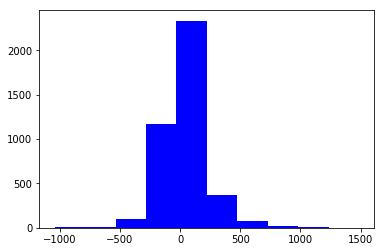

In [8]:
plt.hist(df['Amount'],bins=10, facecolor='blue')
plt.show()

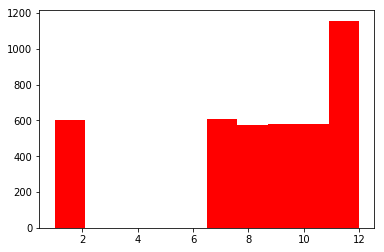

In [9]:
plt.hist(df['Month'],bins=10, facecolor='red')
plt.show()

## Sales by Month, Day and Hour

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64


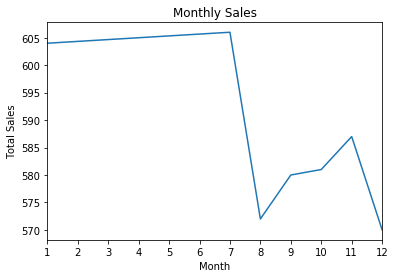

In [10]:
# By Monthly

sale_by_month = df.groupby('Month').size()
print(sale_by_month)

#plot the Graph
plot_month = sale_by_month.plot(title= 'Monthly Sales', xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('Month')
plot_month.set_ylabel('Total Sales')
plt.show()

Day
1     121
2     144
3     133
4     137
5     133
6     138
7     123
8     118
9     137
10    137
11    140
12    141
13    138
14    139
15    141
16    133
17    122
18    151
19    137
20    130
21    136
22    133
23    145
24    124
25    112
26    123
27    135
28    138
29    145
30    138
31     78
dtype: int64


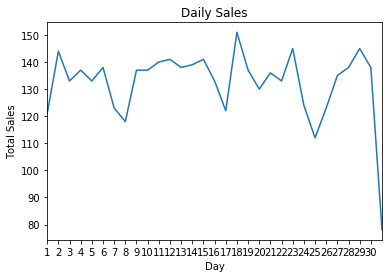

In [11]:
# Daily

sale_by_day = df.groupby('Day').size()
print(sale_by_day)

#plot the Graph
plot_day = sale_by_day.plot(title= 'Daily Sales', xticks=(range(1,31)))
plot_day.set_xlabel('Day')
plot_day.set_ylabel('Total Sales')
plt.show()

Hour
8     126
9     350
10    417
11    449
12    484
13    487
14    473
15    452
16    442
17    350
18     69
19      1
dtype: int64


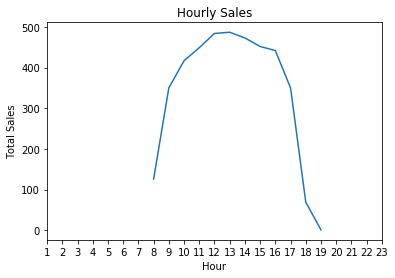

In [12]:
# Hourly

sale_by_hour = df.groupby('Hour').size()
print(sale_by_hour)

#plot the Graph
plot_hour = sale_by_hour.plot(title= 'Hourly Sales', xticks=(range(1,24)))
plot_hour.set_xlabel('Hour')
plot_hour.set_ylabel('Total Sales')
plt.show()

Stores starts around 8 AM in the morning. Most sales are in the afternoon